## UV lightcurve from Bolometric lightcurve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import pandas as pd


In [2]:
%matplotlib qt

In [3]:
%matplotlib inline

In [4]:
#constants (cgs)
h = 6.626e-27 #erg s
k = 1.38e-16 #erg/K
c = 3.00e10 #cm/s

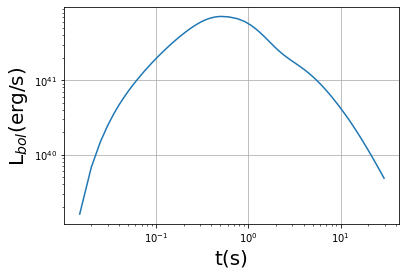

In [5]:
data = np.loadtxt('input_files/lightcurve.dat',delimiter=" ")
t = data[:,0] #seconds
LBol = data[:,1] #erg/s
T = data[:,2] #K

#plot bolometric light curve
plt.loglog(t,LBol)
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('L$_{bol}$(erg/s)', fontsize=20)
plt.grid(1)
plt.show()

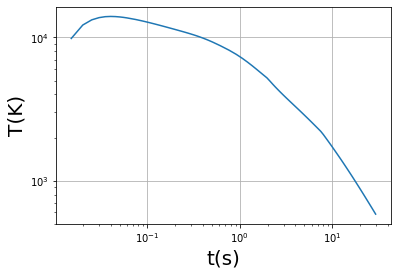

In [6]:
plt.loglog(t,T)
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('T(K)', fontsize=20)
plt.grid(1)
plt.show()

I assume the spectral shape is a black body. So spectral radiance is given by $B_\nu$ ($\rm{erg s^{-1} m^{-2} sr^{-1} Hz^{-1}}$) . I use the Bolometric luminosity from the data to get a radius for the black body: 
$$
R^2 = \frac{L_{\rm{BOL}}}{(4 \pi)^2 \int_0^\infty B_\nu d\nu} =\frac{L_{\rm{BOL}}}{(4 \pi)^2 \frac{2h}{c^2}\big(\frac{k_{\rm{B}}T}{h}\big)^4\frac{\pi^4}{15}}.
$$

Then the luminosity $L$ ($\rm{erg s^{-1}}$) in a given frequency band is given by

$$
    L_{[\nu_1-\nu_2]}=\int_{\nu_1}^{\nu_2}L_\nu d\nu=(4\pi R)^2\int_{\nu_1}^{\nu_2}B_\nu d\nu,
$$
where
$$
    B_\nu = \frac{2 h \nu^3}{c^2}\big[\frac{1}{e^{h\nu/k_B T}-1}\big].
$$
I calculate this for all time steps so $T=T(t), R=R(t), L=L(t)$.

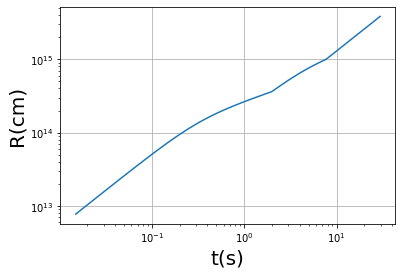

In [7]:
R = np.sqrt(15*LBol*h**3*c**2/(2**5*np.pi**6*(k*T)**4))

#plot R
plt.loglog(t,R)
plt.xlabel('t(s)',fontsize=20)
plt.ylabel('R(cm)', fontsize=20)
plt.grid(1)
plt.show()

In [8]:
def B_of_nu(nu):
    B=2*h*nu**3/(c**2*(np.exp(h*nu/(k*T[i]))-1))
    return(B)
#i are the timesteps, and T is time dependent!
# the reason i is not an imput parameter for the function (even though it would make sense for it to be) is because I wouldn't know how to make the integration work that follows later.

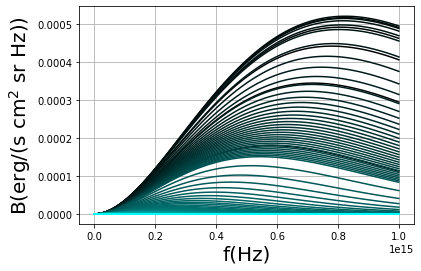

In [9]:
n_freq = 100 #number of frequency steps
m = len(T) #data length (in terms of timesteps) 
f = np.zeros((n_freq,m))
B = np.zeros((n_freq,m))

for i in range(m):
    f[:,i] = np.linspace(1,10**15,n_freq);
    B[:,i] = B_of_nu(f[:,i])
    b = i/m
    plt.plot(f[:,i],B[:,i],color=[0,b,b])
plt.ylabel('B(erg/(s cm$^{2}$ sr Hz))',fontsize=20)
plt.xlabel('f(Hz)', fontsize=20)
plt.grid(1)
plt.show() #gets more cyan over time

## GIF

In [10]:
#import gif
#gif.options.matplotlib["dpi"] = 300

#@gif.frame
#def plot_BB(j):
#    plt.plot(f[:,j],B[:,j])
#    plt.grid(1)

#frames = []
#for j in range(m):
#    frame = plot_BB(j)
#    frames.append(frame)

#gif.save(frames, 'output_files/BB_curves.gif', duration=20, unit='s',between="startend")



In [11]:
def LC_Band(min_nu,max_nu):
    value,Error = quad(B_of_nu,min_nu,max_nu) #B_of_nu is a function of i!
    return((4*np.pi*R[i])**2*value) #R is a function of i!

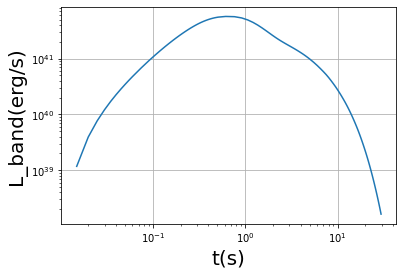

In [12]:
nu_min=10**14
nu_max=10**15
L = np.zeros(m)

for i in range(m):
    L[i]=LC_Band(nu_min,nu_max)
plt.loglog(t,L)
plt.ylabel('L_band(erg/s)',fontsize=20)
plt.xlabel('t(s)', fontsize=20)
plt.grid(1)
plt.show() #luminosity within some frequency band

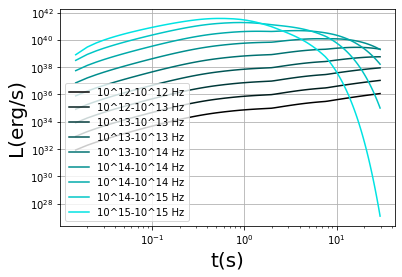

In [13]:
n_nu = 10 # number of frequency steps
nu_min = 12
nu_max = 15

nu = np.logspace(nu_min,nu_max,n_nu)
L = np.zeros((m,n_nu-1))



for j in range(n_nu-1):
    for i in range(m):
        L[i,j]=LC_Band(nu[j],nu[j+1])
    b = j/(n_nu-1)
    plt.loglog(t,L[:,j],color=[0,b,b],label=r'10^{:0.0f}-10^{:0.0f} Hz'.format(np.log10(nu[j]),np.log10(nu[j+1])))
plt.legend()
plt.ylabel('L(erg/s)',fontsize=20)
plt.xlabel('t(s)', fontsize=20)
plt.grid(1)
plt.show() #gets bluer over frequency increase

## I'm now doing the exact same thing over again but now in terms of wavelength
The spectral density in terms of wavelength:
$$
    B(\lambda) = \frac{2hc^2}{\lambda^5}\frac{1}{e^{hc/\lambda k_B T}-1},
$$

with units $erg s^{-1} sr^{-1} cm^{-3}$.

In [14]:
def B_of_lambda(l):
    B=2*h*c**2/(l**5*(np.exp(h*c/(l*k*T[i]))-1))
    return(B)
#i are the timesteps, and T is time dependent!
# the reason i is not an imput parameter for the function (even though it would make sense for it to be) is because I don't know how to do the quad function then.

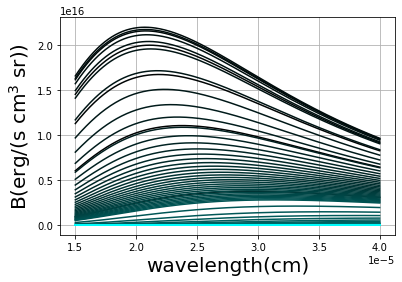

In [15]:
n_l = 250+1 #number of wavelength steps
m = len(T) #data length (in terms of timesteps) 
l = np.zeros((n_l,m))
B = np.zeros((n_l,m))
l_min=150e-7 #nm
l_max= 400e-7 #nm

for i in range(m):
    l[:,i] = np.linspace(l_min,l_max,n_l);
    B[:,i] = B_of_lambda(l[:,i])
    b = i/m
    plt.plot(l[:,i],B[:,i],color=[0,b,b])


plt.ylabel('B(erg/(s cm$^{3}$ sr))',fontsize=20)
plt.xlabel('wavelength(cm)', fontsize=20)
plt.grid(1)
plt.show() #gets more cyan over time

In [16]:
df = pd.DataFrame(data=B)
df.to_csv('output_files/BB_curves.dat',sep=",")